<a href="https://colab.research.google.com/github/AvivGelfand/Blockchain-Research/blob/main/SurveyResultsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Survey Results

# Libraries

In [ ]:
# Basic
import pandas as pd
import numpy as np
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
# Preprocessing for ML
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# accuracy score for logistic regression
from sklearn.metrics import accuracy_score # we will use it for calculating accuracy of our calssifications
# turn off warnings
import warnings
# warnings.filterwarnings('ignore')

# Loading Data Set

In [ ]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/AvivGelfand/datapool/main/ResultsThin.csv")
to_rplace = {
    "employment_status_Other (please specify):": "employ_status", 
    'Living with a partner': 'Livingwith_a_partner',
    "High school graduate (high school diploma or equivalent including GDE)": "High_school"}
df_raw = df_raw.replace(to_rplace)
df_raw.head(3)

,Duration_min,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,gender,age_bin,marital_status,graduation_level,employment_status,bonus_amount,agreed_to_sell
0,5.12,7,5,6,4,6,5,7,1,3,1,0,55 - 64 years old,Livingwith_a_partner,Phd,Working part-time,5.0,1
1,9.88,4,1,6,2,5,6,6,1,7,1,1,55 - 64 years old,Married,Master's degree,Working full-time,7.5,0
2,9.78,4,5,6,5,4,2,7,1,3,3,0,25 - 34 years old,Married,Bachelor's degree,Working full-time,2.0,1


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Duration_min       249 non-null    float64
 1   TIPI_1             249 non-null    int64  
 2   TIPI_2             249 non-null    int64  
 3   TIPI_3             249 non-null    int64  
 4   TIPI_4             249 non-null    int64  
 5   TIPI_5             249 non-null    int64  
 6   TIPI_6             249 non-null    int64  
 7   TIPI_7             249 non-null    int64  
 8   TIPI_8             249 non-null    int64  
 9   TIPI_9             249 non-null    int64  
 10  TIPI_10            249 non-null    int64  
 11  gender             249 non-null    int64  
 12  age_bin            249 non-null    object 
 13  marital_status     249 non-null    object 
 14  graduation_level   249 non-null    object 
 15  employment_status  249 non-null    object 
 16  bonus_amount       249 non

# Encoding values


## Encoding Age and Education Categories (Ordinal)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

df_ordinal = df_raw.copy()

# age_bin ordinal encoder
age_bin_ordinal_encoder = OrdinalEncoder( # instance of an ordinal encoder
    # inputing the wanted order of importance in a [[]] array
    categories=[['18 - 24 years old','25 - 34 years old','35 - 44 years old','45 - 54 years old', '55 - 64 years old', '65+  years old']]  
  ) 

df_ordinal['age_bin'] = age_bin_ordinal_encoder.fit_transform(df_ordinal['age_bin'].values.reshape(-1, 1))


# graduation level ordinal encoder
graduation_level_ordinal_encoder = OrdinalEncoder( # instance of an ordinal encoder
    categories=[  #inputing the wanted order of importance in a [[]] array
                # ['         0                ',    '                 1                                                '
                ['Less than high school degree','High_school',
                #  ,'2',                                 '3',                 '4',       '5'],
                 'Some college but no degree','Bachelor\'s degree', 'Master\'s degree', 'Phd']]) 

df_ordinal['graduation_level'] = graduation_level_ordinal_encoder.fit_transform(df_ordinal['graduation_level'].values.reshape(-1, 1))

In [ ]:
df_raw['graduation_level'].value_counts(normalize=True)

Bachelor's degree               0.606426
Master's degree                 0.317269
Phd                             0.036145
High_school                     0.028112
Some college but no degree      0.008032
Less than high school degree    0.004016
Name: graduation_level, dtype: float64

In [ ]:
df_raw['age_bin'].value_counts(normalize=True)

25 - 34 years old    0.317269
35 - 44 years old    0.228916
55 - 64 years old    0.164659
45 - 54 years old    0.148594
65+  years old       0.120482
18 - 24 years old    0.020080
Name: age_bin, dtype: float64

## Encoding with ``` get_dummies()``` method


In [ ]:
df_dummies = df_raw.copy()
df_dummies['bonus_amount'] = df_dummies['bonus_amount'].astype(str)
categorical_columns = df_dummies.select_dtypes(include='object').columns # can also include date
numeric_columns = df_dummies.select_dtypes(include='number').columns

df_dummies = pd.get_dummies(data = df_dummies,
                    columns = categorical_columns , # we created this list          
                    drop_first =True  # True: -> yes: {0, 1} and no: {0,1}.   # defualt is False
) 
# df_encode
df_dummies.loc[:, ~df_dummies.columns.isin(numeric_columns)].head() # select all non-numeric columns

,age_bin_25 - 34 years old,age_bin_35 - 44 years old,age_bin_45 - 54 years old,age_bin_55 - 64 years old,age_bin_65+ years old,marital_status_Livingwith_a_partner,marital_status_Married,marital_status_Single,marital_status_Widowed,graduation_level_High_school,...,employment_status_Student,employment_status_Unemployed and looking for work,employment_status_Working full-time,employment_status_Working part-time,bonus_amount_1.0,bonus_amount_10.0,bonus_amount_2.0,bonus_amount_3.5,bonus_amount_5.0,bonus_amount_7.5
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# df_raw = pd.read_csv("https://raw.githubusercontent.com/AvivGelfand/datapool/main/ResultsThin.csv")
df_raw.describe()

,Duration_min,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,TIPI_10,gender,bonus_amount,agreed_to_sell
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,30.902410,4.116466,3.554217,4.702811,3.244980,5.008032,4.032129,5.317269,2.345382,4.646586,2.979920,0.337349,6.154618,0.385542
std,270.459045,1.477823,1.502039,1.745972,1.539868,1.355966,1.453226,1.382401,1.417485,1.527833,1.548802,0.473758,3.564949,0.487703
min,2.270000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,5.580000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000,5.000000,1.000000,4.000000,2.000000,0.000000,3.500000,0.000000
50%,7.180000,4.000000,4.000000,5.000000,3.000000,5.000000,4.000000,6.000000,2.000000,5.000000,3.000000,0.000000,7.500000,0.000000
75%,10.250000,5.000000,5.000000,6.000000,4.000000,6.000000,5.000000,6.000000,3.000000,6.000000,4.000000,1.000000,10.000000,1.000000
max,4251.480000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000,10.000000,1.000000


In [ ]:
df_raw.describe(include=np.object)

<ipython-input-117-f48a72e22442>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_raw.describe(include=np.object)


,age_bin,marital_status,graduation_level,employment_status
count,249,249,249,249
unique,6,5,6,12
top,25 - 34 years old,Married,Bachelor's degree,Working full-time
freq,79,164,151,161


## **Encoding TIPI**

In [ ]:
def update_users_dict(df):
    new_cols = ['extraverted', 'introverted', "critical", "sympathetic", "self-disciplined", "careless", "anxious", "mentally_stable", "open_minded", "close_minded"]
    df[new_cols] = 0
    for item in range(len(df)):
      if (df["TIPI_1"][item] == 6 or df["TIPI_1"][item] == 7) and \
              (df["TIPI_6"][item] == 1 or df["TIPI_6"][item] == 2):
                    df['extraverted'][item] = 1
      elif (df["TIPI_1"][item] == 1 or df["TIPI_1"][item] == 2) and \
              (df["TIPI_6"][item] == 6 or df["TIPI_6"][item] == 7):
                    df['introverted'][item] = 1

      if (df["TIPI_2"][item] == 1 or df["TIPI_2"][item] == 2) and \
              (df["TIPI_7"][item] == 6 or df["TIPI_7"][item] == 7):
                    df['sympathetic'][item] = 1

      elif (df["TIPI_2"][item] == 6 or df["TIPI_2"][item] == 7) and \
              (df["TIPI_7"][item] == 1 or df["TIPI_7"][item] == 2):
                    df['critical'][item] = 1

      if (df["TIPI_3"][item] == 6 or df["TIPI_3"][item] == 7) and \
              (df["TIPI_8"][item] == 1 or df["TIPI_8"][item] == 2):
                    df['self-disciplined'][item] = 1

      elif (df["TIPI_3"][item] == 1 or df["TIPI_3"][item] == 2) and \
              (df["TIPI_8"][item] == 6 or df["TIPI_8"][item] == 7):
                    df['careless'][item] = 1

      if (df["TIPI_4"][item] == 1 or df["TIPI_4"][item] == 2) and \
              (df["TIPI_9"][item] == 6 or df["TIPI_9"][item] == 7):
                    df['mentally_stable'][item] = 1

      elif (df["TIPI_4"][item] == 6 or df["TIPI_4"][item] == 7) and \
              (df["TIPI_9"][item] == 1 or df["TIPI_9"][item] == 2):
                    df['anxious'][item] = 1

      if (df["TIPI_5"][item] == 6 or df["TIPI_5"][item] == 7) and \
              (df["TIPI_10"][item] == 1 or df["TIPI_10"][item] == 2):
                    df['open_minded'][item] = 1

      elif (df["TIPI_5"][item] == 1 or df["TIPI_5"][item] == 2) and \
              (df["TIPI_10"][item] == 6 or df["TIPI_10"][item] == 7):
                    df['close_minded'][item] = 1
      # df.drop(['TIPI_1',	'TIPI_2',	'TIPI_3',	'TIPI_4'	,'TIPI_5'	,'TIPI_6'	,'TIPI_7',	'TIPI_8',	'TIPI_9', 'TIPI_10'], axis=1, inplace=True)

update_users_dict(df_dummies);
update_users_dict(df_raw);
update_users_dict(df_ordinal);

<ipython-input-118-be1feafa6182>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['self-disciplined'][item] = 1
<ipython-input-118-be1feafa6182>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open_minded'][item] = 1
<ipython-input-118-be1feafa6182>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sympathetic'][item] = 1
<ipython-input-118-be1feafa6182>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [ ]:
df_dummies.drop(['TIPI_1',	'TIPI_2',	'TIPI_3',	'TIPI_4'	,'TIPI_5'	,'TIPI_6'	,'TIPI_7',	'TIPI_8',	'TIPI_9', 'TIPI_10'], axis=1, inplace=True)

In [ ]:
# cols_drop = ['TIPI_1',	'TIPI_2',	'TIPI_3',	'TIPI_4'	,'TIPI_5'	,'TIPI_6'	,'TIPI_7',	'TIPI_8',	'TIPI_9', 'TIPI_10']
# for col in cols_drop:
#   if 
#   df = df.drop(, axis=1)
#   df.head(2)

In [ ]:
# df[['careless','close_minded' ]]

In [ ]:
# df[['careless','close_minded' ]].value_counts()

In [ ]:
# any(df.close_minded != df.careless)

# Exploratory Data Analysis - להציג התפלגויות של דמוגרפיות

## Barplots

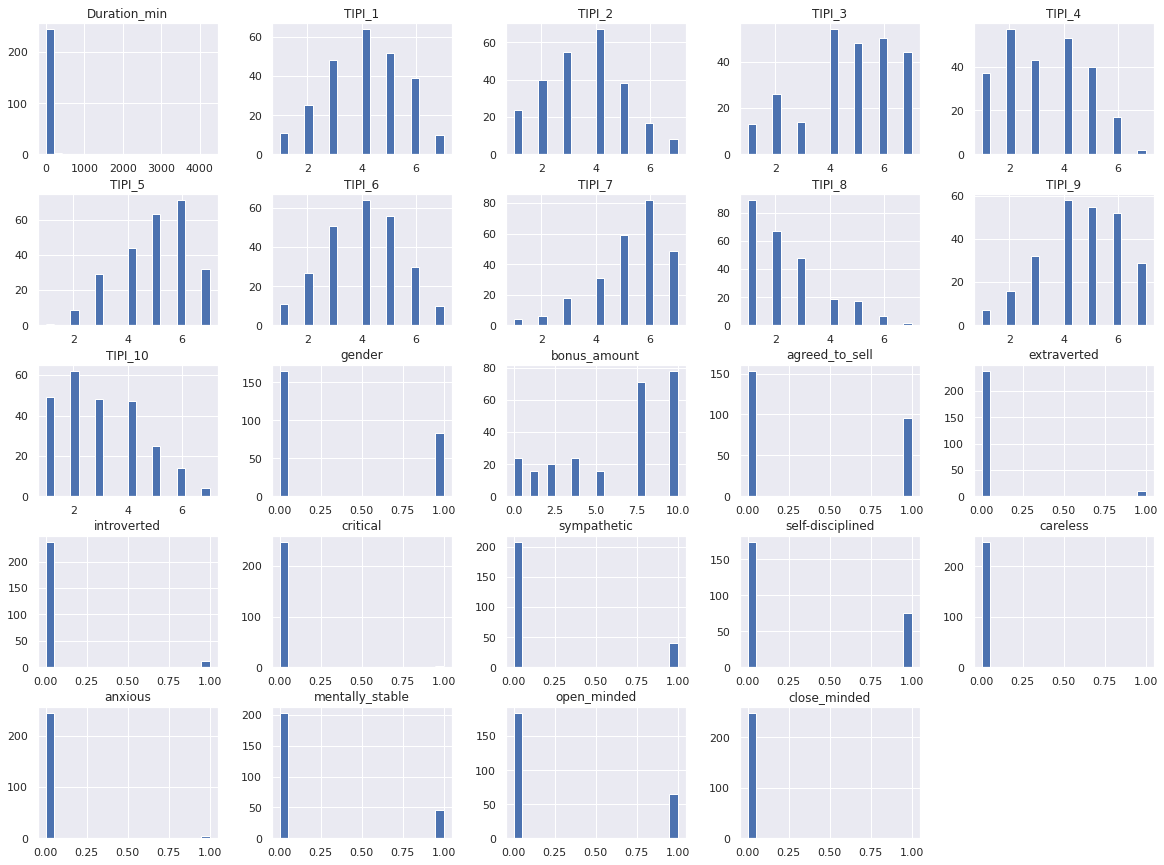

In [ ]:
df_raw.hist(figsize=(20,15),bins=20);

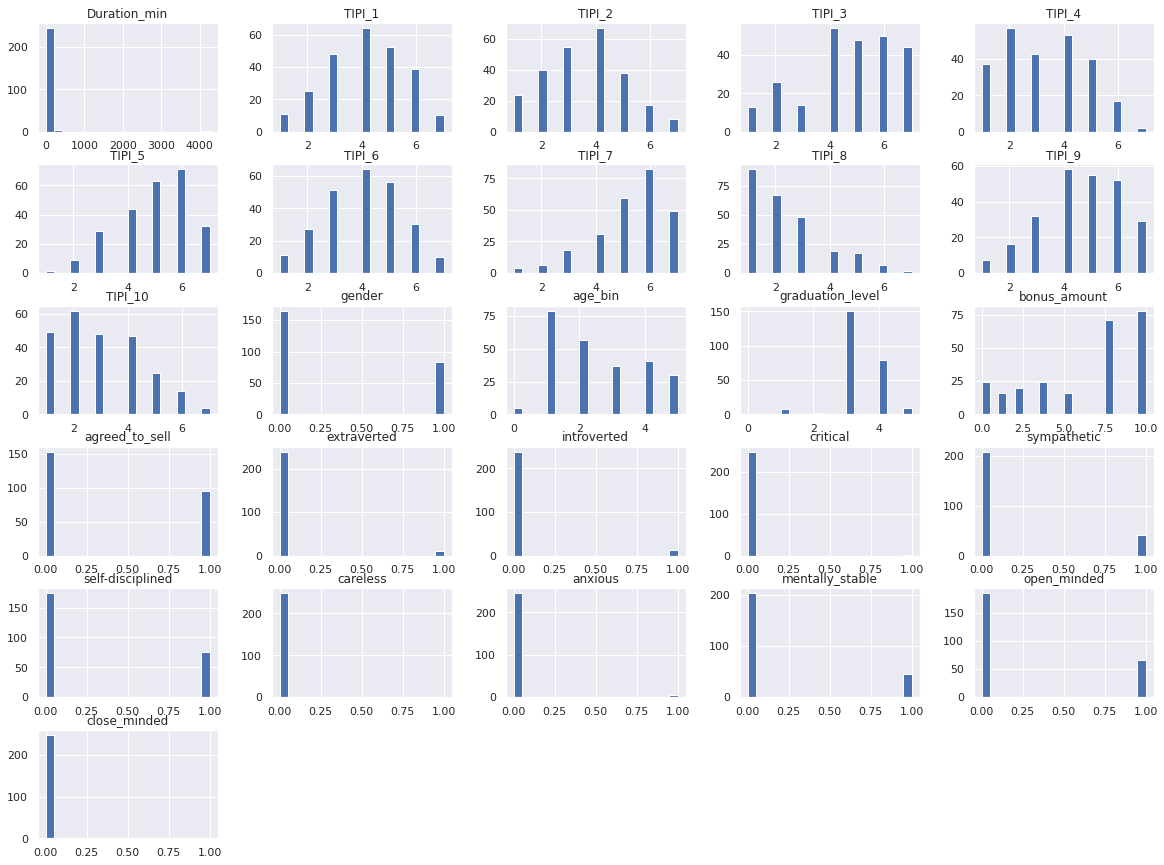

In [ ]:
df_ordinal.hist(figsize=(20,15),bins=20);

In [ ]:
# df_encode
# df_raw.loc[:, ~df.columns.isin(numeric_columns)].head()
# df_raw.hist(figsize=(30,15),bins=20);

## Correlations Matrix

Raw Data Spearman Correlations


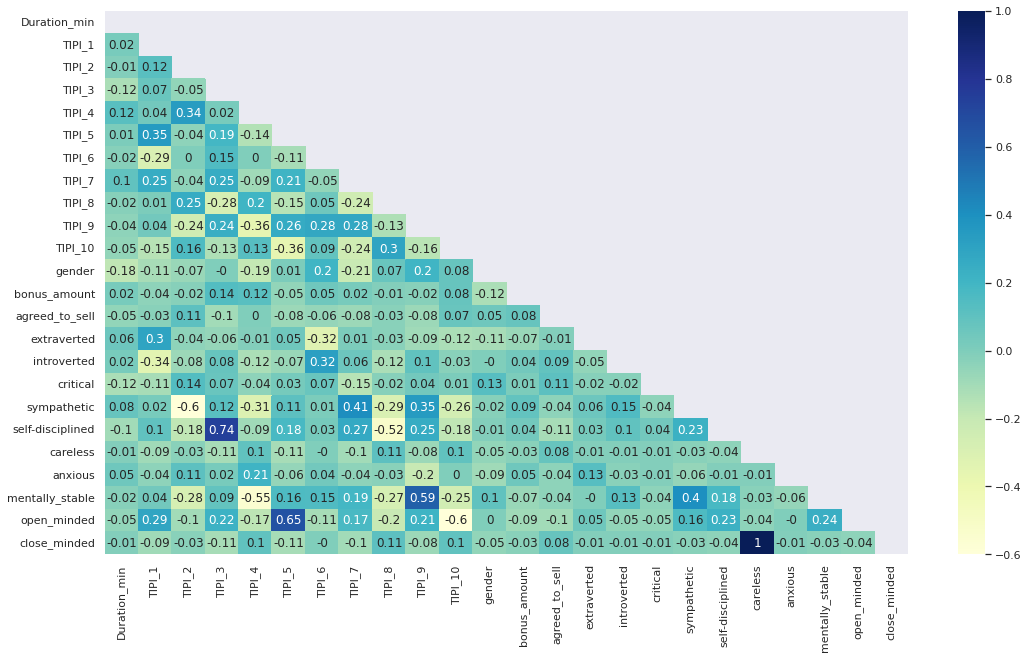

In [ ]:
# df = pd.read_csv("https://raw.githubusercontent.com/AvivGelfand/datapool/main/ResultsThin.csv")
# df['bonus_amount'] = df['bonus_amount'].astype(str)
sns.set(rc={'figure.figsize':(18,10)})
dfs = [df_raw, df_dummies, df_ordinal]
# for df_i in dfs:
print("Raw Data Spearman Correlations")
sns.heatmap(round(df_raw.corr(method='spearman'),2), cmap="YlGnBu", annot=True, mask=np.triu(df_raw.corr()), );
# sns.title="Raw Data Spearman"

Dummies Data Spearman Correlations


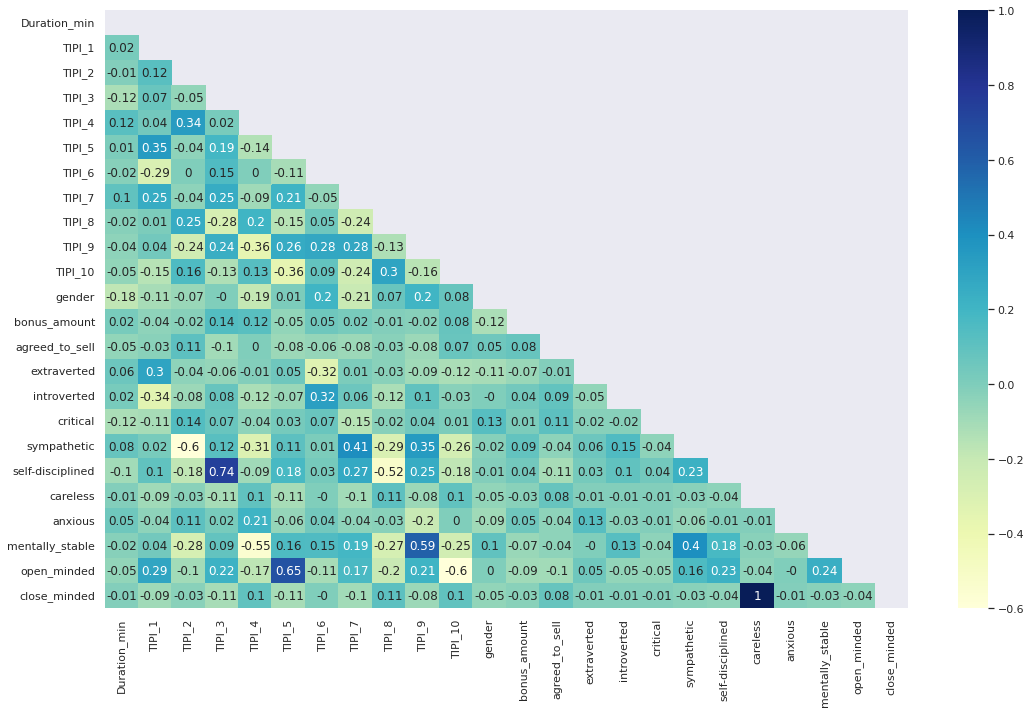

In [ ]:
sns.set(rc={'figure.figsize':(18,11)})
print("Dummies Data Spearman Correlations")
df_dummies = df_raw.replace(to_rplace)
# df_dummies
sns.heatmap(round(df_dummies.corr(method='spearman'),2), cmap="YlGnBu", annot=True, mask=np.triu(df_dummies.corr()));

Ordinal Encoded Data Spearman Correlations


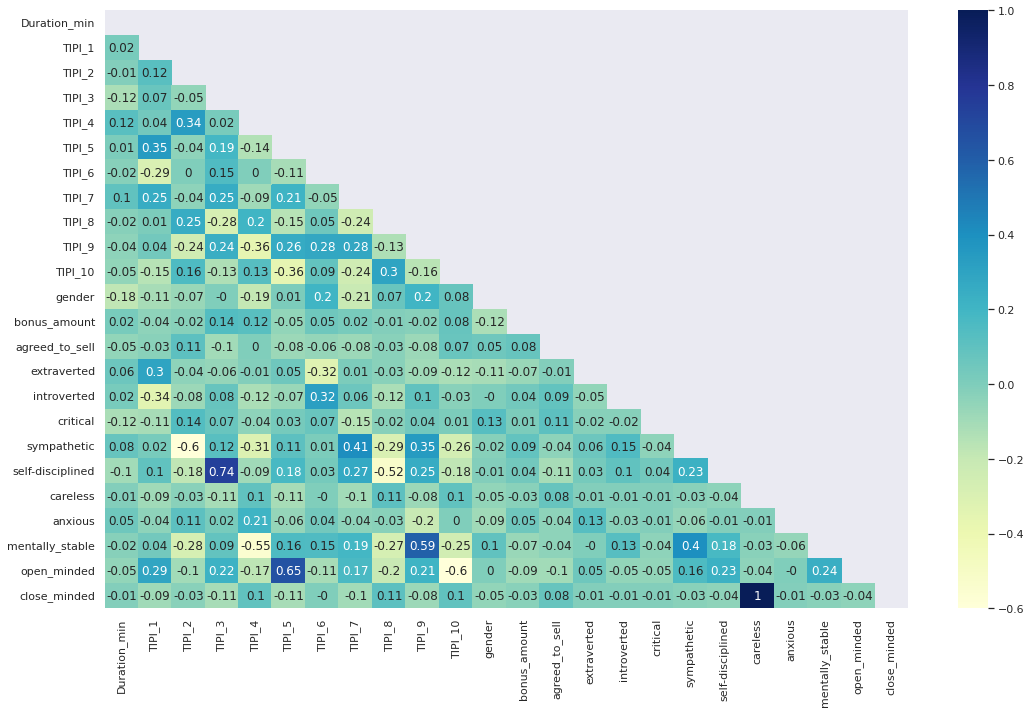

In [ ]:
sns.set(rc={'figure.figsize':(18,11)})
print("Ordinal Encoded Data Spearman Correlations")
df_ordinal = df_raw.replace(to_rplace)
# df_dummies
sns.heatmap(round(df_ordinal.corr(method='spearman'),2), cmap="YlGnBu", annot=True, mask=np.triu(df_ordinal.corr()));

Correlated: 
* Bonus ammount ~ agreed to sell: 0.1 - weak and positive
*  careless ~ close minded : 1  - random


In [ ]:
# corsell = df.corr()[['agreed_to_sell']].sort_values('agreed_to_sell', ascending=False).T.iloc[:,1:]
# df.corr()[['agreed_to_sell']].sort_values('agreed_to_sell', ascending=False).T.iloc[:,1:]

# Correlations with `agreed_to_sell`

In [ ]:
# sns.set(rc={'figure.figsize':(18,6)}, font_scale=1.2)
# ax = sns.heatmap(corsell, cmap="YlGnBu", annot=True)

In [ ]:
numeric_columns = df_raw.select_dtypes(include='number').columns
numeric_columns

Index(['Duration_min', 'TIPI_1', 'TIPI_2', 'TIPI_3', 'TIPI_4', 'TIPI_5',
       'TIPI_6', 'TIPI_7', 'TIPI_8', 'TIPI_9', 'TIPI_10', 'gender',
       'bonus_amount', 'agreed_to_sell', 'extraverted', 'introverted',
       'critical', 'sympathetic', 'self-disciplined', 'careless', 'anxious',
       'mentally_stable', 'open_minded', 'close_minded'],
      dtype='object')

#Bottom Line 2

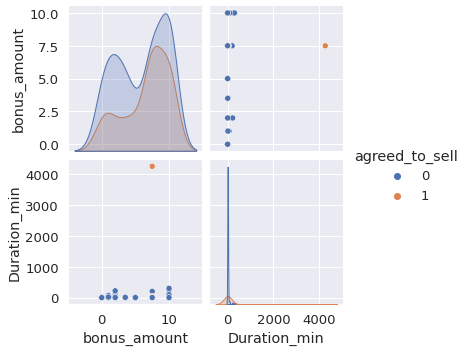

In [ ]:
sns.set(rc={'figure.figsize':(30,10)}, font_scale=1.2)
sns.pairplot(df_raw, vars = ['bonus_amount', 'Duration_min'], hue = "agreed_to_sell");

In [ ]:
df_raw.head()

,Duration_min,TIPI_1,TIPI_2,TIPI_3,TIPI_4,TIPI_5,TIPI_6,TIPI_7,TIPI_8,TIPI_9,...,extraverted,introverted,critical,sympathetic,self-disciplined,careless,anxious,mentally_stable,open_minded,close_minded
0,5.12,7,5,6,4,6,5,7,1,3,...,0,0,0,0,1,0,0,0,1,0
1,9.88,4,1,6,2,5,6,6,1,7,...,0,0,0,1,1,0,0,1,0,0
2,9.78,4,5,6,5,4,2,7,1,3,...,0,0,0,0,1,0,0,0,0,0
3,6.27,5,4,4,4,6,5,5,5,4,...,0,0,0,0,0,0,0,0,0,0
4,4251.48,5,3,5,2,6,4,5,2,5,...,0,0,0,0,0,0,0,0,1,0


# Modeling with Logistic Regression

## Selecting numeric features

In [ ]:
numeric_columns = df_dummies.select_dtypes(include='number').columns
numeric_columns

Index(['Duration_min', 'TIPI_1', 'TIPI_2', 'TIPI_3', 'TIPI_4', 'TIPI_5',
       'TIPI_6', 'TIPI_7', 'TIPI_8', 'TIPI_9', 'TIPI_10', 'gender',
       'bonus_amount', 'agreed_to_sell', 'extraverted', 'introverted',
       'critical', 'sympathetic', 'self-disciplined', 'careless', 'anxious',
       'mentally_stable', 'open_minded', 'close_minded'],
      dtype='object')

## Stadartizing נשאר להריץ רגרסיות על שלושת הדאטה סטים

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df_dummies[numeric_columns].drop('agreed_to_sell',axis=1)
y = df_dummies['agreed_to_sell']
scaler = StandardScaler() # Standardize
X_standerdized = X.copy()
X_standerdized = scaler.fit_transform(X_standerdized)

In [ ]:
X_standerdized

array([[-0.09552033,  1.95513354,  0.96448564, ..., -0.47602624,
         1.682489  , -0.06350006],
       [-0.07788518, -0.07896779, -1.70392464, ...,  2.10072451,
        -0.59435753, -0.06350006],
       [-0.07825566, -0.07896779,  0.96448564, ..., -0.47602624,
        -0.59435753, -0.06350006],
       ...,
       [-0.09455707, -0.07896779,  1.63158822, ..., -0.47602624,
        -0.59435753, -0.06350006],
       [-0.03157437, -0.07896779,  0.96448564, ..., -0.47602624,
        -0.59435753, -0.06350006],
       [-0.09344561, -0.07896779,  0.96448564, ..., -0.47602624,
        -0.59435753, -0.06350006]])

In [ ]:
# X_standerdized = pd.DataFrame(X_standerdized, columns=['Duration_min','gender','age_bin','graduation_level', 'bonus_amount', 'extraverted','introverted', 'critical', 'sympathetic', 'self-disciplined','careless', 'anxious', 'mentally_stable', 'open_minded','close_minded'])
# X_standerdized

# Bottom Line 3


## Building a logistic regression model

In [ ]:
# importing libraries
import statsmodels.api as sm
# building the model and fitting the scaled data by
# using Logit() function, to calculate the logistic regression
log_reg = sm.Logit(y, X_standerdized).fit() 
print(log_reg.summary()) # seeing a detailed table of the model

Optimization terminated successfully.
         Current function value: 0.608412
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         agreed_to_sell   No. Observations:                  249
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                           21
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                 0.08744
Time:                        20:35:55   Log-Likelihood:                -151.49
converged:                       True   LL-Null:                       -166.01
Covariance Type:            nonrobust   LLR p-value:                    0.1132
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1478      0.198      0.747      0.455      -0.240       0.535
x2             0.1553      0.

* There is not enough data for a robust model.
* Bonus bonus_amount has the most significant value.

## Evaluating accuracy

In [ ]:
  log_reg.predict(X_standerdized)
  decision_threshold = 0.5 # lets change that up a bit and see what happens

  train_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  test_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  accuracy_train = accuracy_score(train_preds, y)
  accuracy_scores.append(accuracy_train)
  print(f"Accuracy score: {accuracy_train}")

In [ ]:
log_reg.predict(X_standerdized)
accuracy_scores = []
for i in np.arange (0.01, 0.99, 0.01):
  decision_threshold = i # lets change that up a bit and see what happens
  train_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  test_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  accuracy_train = accuracy_score(train_preds, y)
  accuracy_scores.append(accuracy_train)
  print(f"Accuracy with {i}: {accuracy_train}")

In [ ]:
# accuracy_scores.index(max(accuracy_scores)+1)

In [ ]:
# np.arange (0.01, 0.99, 0.01)

# range(0.01, 0.99, 0.01)

In [ ]:
  decision_threshold = 0.5 # lets change that up a bit and see what happens

  train_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  test_preds = ((log_reg.predict(X_standerdized)) > decision_threshold).astype(int)
  accuracy_train = accuracy_score(train_preds, y)
  accuracy_scores.append(accuracy_train)
  print(f"Accuracy score: {accuracy_train}")